In [372]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [373]:
dfmo = pd.read_csv('../data/monday.csv', delimiter=';', parse_dates=['timestamp'])
dfmo.shape

(4884, 3)

In [374]:
dftu = pd.read_csv('../data/tuesday.csv', delimiter=';', parse_dates=['timestamp'])
dftu.shape

(4714, 3)

In [375]:
dfwe = pd.read_csv('../data/wednesday.csv', delimiter=';', parse_dates=['timestamp'])
dfwe.shape

(5050, 3)

In [376]:
dfth = pd.read_csv('../data/thursday.csv', delimiter=';', parse_dates=['timestamp'])
dfth.shape

(5104, 3)

In [377]:
dffr = pd.read_csv('../data/friday.csv', delimiter=';', parse_dates=['timestamp'])
dffr.shape

(5125, 3)

In [378]:
week = pd.concat([dfmo, dftu, dfwe, dfth, dffr], ignore_index=True, sort=True)
week

,customer_no,location,timestamp
0,1,dairy,2019-09-02 07:03:00
1,2,dairy,2019-09-02 07:03:00
2,3,dairy,2019-09-02 07:04:00
3,4,dairy,2019-09-02 07:04:00
4,5,spices,2019-09-02 07:04:00
...,...,...,...
24872,1500,dairy,2019-09-06 21:50:00
24873,1507,checkout,2019-09-06 21:50:00
24874,1508,checkout,2019-09-06 21:50:00
24875,1509,drinks,2019-09-06 21:50:00


In [379]:
week = week.set_index('timestamp')
week

,customer_no,location
timestamp,,
2019-09-02 07:03:00,1,dairy
2019-09-02 07:03:00,2,dairy
2019-09-02 07:04:00,3,dairy
2019-09-02 07:04:00,4,dairy
2019-09-02 07:04:00,5,spices
...,...,...
2019-09-06 21:50:00,1500,dairy
2019-09-06 21:50:00,1507,checkout
2019-09-06 21:50:00,1508,checkout


In [385]:
week['day']= week.index.weekday
week

,customer_no,location,day
timestamp,,,
2019-09-02 07:03:00,1,dairy,0
2019-09-02 07:03:00,2,dairy,0
2019-09-02 07:04:00,3,dairy,0
2019-09-02 07:04:00,4,dairy,0
2019-09-02 07:04:00,5,spices,0
...,...,...,...
2019-09-06 21:50:00,1500,dairy,4
2019-09-06 21:50:00,1507,checkout,4
2019-09-06 21:50:00,1508,checkout,4


In [386]:
week['customer_day'] = week['customer_no'].astype(str) + week['day'].astype(str)
week['customer_day'] =week['customer_day'].astype(int)

In [387]:
week['location'].value_counts()

checkout    7417
fruit       5122
dairy       4679
drinks      3905
spices      3754
Name: location, dtype: int64

In [366]:
# timestamp only occurs when customer changes the state
# fill minutes in between?!
week[week['customer_day'] == 60]

,customer_no,location,day,customer_day
timestamp,,,,
2019-09-02 07:04:00,6,spices,0,60
2019-09-02 07:05:00,6,dairy,0,60
2019-09-02 07:17:00,6,spices,0,60
2019-09-02 07:18:00,6,drinks,0,60
2019-09-02 07:25:00,6,spices,0,60
2019-09-02 07:26:00,6,dairy,0,60
2019-09-02 07:27:00,6,spices,0,60
2019-09-02 07:29:00,6,checkout,0,60


In [367]:
time_spent = week[week['customer_day'] == 60].index.max() - week[week['customer_day'] == 60].index.min()
time_spent

Timedelta('0 days 00:25:00')

In [368]:
#filling up all minutes for all uniqu costomers means 33million rows
7445 * 4500
#better only fill the customer journey from first timestamp to checkout, if no checkout > create checkout?!

33502500

In [289]:
len(week['customer_day'].unique())

7445

In [290]:
# five days/15hours/60 minutes
minutes = 5 * (21-7+1) * 60
minutes

4500

In [291]:
fruits = week[week['location'] == 'fruit']
fruits['customer_day'].nunique()

4284

In [294]:
week["hour"] = week.index.hour
week

,customer_no,location,day,customer_day,hour
timestamp,,,,,
2019-09-02 07:03:00,1,dairy,0,10,7
2019-09-02 07:03:00,2,dairy,0,20,7
2019-09-02 07:04:00,3,dairy,0,30,7
2019-09-02 07:04:00,4,dairy,0,40,7
2019-09-02 07:04:00,5,spices,0,50,7
...,...,...,...,...,...
2019-09-06 21:50:00,1500,dairy,4,15004,21
2019-09-06 21:50:00,1507,checkout,4,15074,21
2019-09-06 21:50:00,1508,checkout,4,15084,21


<AxesSubplot:xlabel='location'>

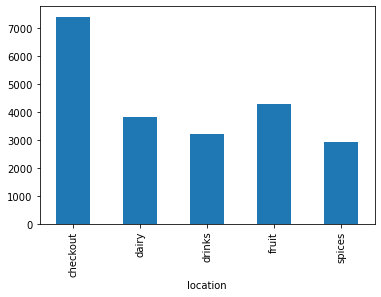

In [295]:
# Calculate the total number of customers in each section
custom = week.groupby('location')['customer_day'].nunique()
custom.plot(kind='bar')

<AxesSubplot:xlabel='hour'>

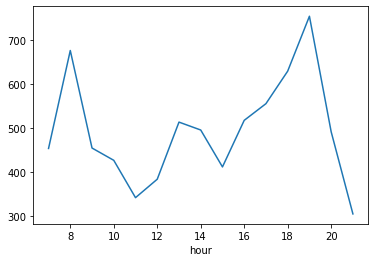

In [320]:
# Display the number of customers at checkout over time
week_checkout = week[week['location']== 'checkout']
w_c = week_checkout.groupby(['hour'])['customer_day'].nunique()
w_c.plot()

In [336]:
# Calculate the time each customer spent in the market
time_spent = week[week['customer_day'] == 10].index.max() - week[week['customer_day'] == 10].index.min()
time_spent
# how for every customer?!?!

Timedelta('0 days 00:02:00')

In [249]:
week.describe()

,customer_no,day,customer_day,hour
count,24877.000000,24877.000000,24877.000000,24877.000000
mean,745.139647,2.035052,7453.431523,14.125417
std,429.478200,1.415228,4294.848328,4.324691
min,1.000000,0.000000,10.000000,7.000000
25%,372.000000,1.000000,3720.000000,10.000000
50%,747.000000,2.000000,7474.000000,14.000000
75%,1116.000000,3.000000,11164.000000,18.000000
max,1535.000000,4.000000,15353.000000,21.000000


In [250]:
week

,customer_no,location,day,customer_day,hour
timestamp,,,,,
2019-09-02 07:03:00,1,dairy,0,10,7
2019-09-02 07:03:00,2,dairy,0,20,7
2019-09-02 07:04:00,3,dairy,0,30,7
2019-09-02 07:04:00,4,dairy,0,40,7
2019-09-02 07:04:00,5,spices,0,50,7
...,...,...,...,...,...
2019-09-06 21:50:00,1500,dairy,4,15004,21
2019-09-06 21:50:00,1507,checkout,4,15074,21
2019-09-06 21:50:00,1508,checkout,4,15084,21
